In [1]:
### Import required library
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
py.init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
### Read 3 datafiles containing data for Bitcoin price, sentiments, google trend,etc.)
data1 = pd.read_csv('Bitcoin_US.csv')
data2 = pd.read_csv('BitcoinData1.csv')
data4 = pd.read_csv("Bitcoinsentiments.txt")

In [3]:
## Change date to datetime and index the dataframe on date
data1['Date']= pd.to_datetime(data1['Date']).apply(lambda x:x.strftime('%Y%m%d'))
data1.index = data1['Date']
del data1['Date']
data1.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
20140107,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
20140108,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
20140109,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
20140110,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
20140111,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 20140107 to 20171017
Data columns (total 7 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
dtypes: float64(7)
memory usage: 86.2+ KB


In [5]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
stamp        642 non-null int64
sentiment    642 non-null float64
dtypes: float64(1), int64(1)
memory usage: 10.1 KB


In [6]:
## Index datafile 4 on 'stamp'
data4.index = data4['stamp']
del data4['stamp']
data4.head()

,sentiment
stamp,
20171114,0.380219
20171113,0.380219
20171112,0.380219
20171111,0.380219
20171110,0.380219


In [7]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 20171114 to 20160211
Data columns (total 1 columns):
sentiment    642 non-null float64
dtypes: float64(1)
memory usage: 10.0 KB


In [8]:
# Concatenate datafile1 and datafile4into dataframe data5
data5 =  pd.concat([data1.reset_index(drop=True), data4.reset_index(drop=True)], axis=1)

In [9]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 8 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
sentiment            642 non-null float64
dtypes: float64(8)
memory usage: 86.3 KB


In [10]:
data5.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219


In [11]:
## Removing any NaN columns
data_5 = data5.dropna(how='any')

In [12]:
## Checking for NaN columns
data_5.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
sentiment            0
dtype: int64

In [13]:
data_5.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219


In [14]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 8 columns):
Open                 642 non-null float64
High                 642 non-null float64
Low                  642 non-null float64
Close                642 non-null float64
Volume (BTC)         642 non-null float64
Volume (Currency)    642 non-null float64
Weighted Price       642 non-null float64
sentiment            642 non-null float64
dtypes: float64(8)
memory usage: 45.1 KB


In [15]:
## Change date to datetime and index the dataframe on date
data2['time']= pd.to_datetime(data2['time']).apply(lambda x:x.strftime('%Y%m%d'))
data2.index = data2['time']
del data2['time']
data2.head()

,XEM,IOT,amd,nvda,mc_iota,mc_nem,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
time,,,,,,,,,,,,,,,,
20170828,0.286,0.8620,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8700,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8699,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.286,0.8800,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352
20170828,0.287,0.8739,12.55,165.100006,2.564020e+09,2.472360e+09,42,73,50,28,45,34,64,1221,57,352


In [16]:
### Concatenate datafile5 and datafile2 into final file data
data =  pd.concat([data5.reset_index(drop=True), data2.reset_index(drop=True)], axis=1)


In [17]:
data.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,sentiment,XEM,IOT,...,gg_crypto,gg_nem_p,gg_iota_p,gg_bitcoin_p,gg_nem_w,gg_iota_w,gg_gpu,rd_CrypCurr_g,rd_nem_g,rd_Iota_g
0,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522,0.380219,0.286,0.8620,...,42,73,50,28,45,34,64,1221,57,352
1,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269,0.380219,0.286,0.8700,...,42,73,50,28,45,34,64,1221,57,352
2,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913,0.380219,0.286,0.8699,...,42,73,50,28,45,34,64,1221,57,352
3,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794,0.380219,0.286,0.8800,...,42,73,50,28,45,34,64,1221,57,352
4,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709,0.380219,0.287,0.8739,...,42,73,50,28,45,34,64,1221,57,352


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 24 columns):
Open                 1380 non-null float64
High                 1380 non-null float64
Low                  1380 non-null float64
Close                1380 non-null float64
Volume (BTC)         1380 non-null float64
Volume (Currency)    1380 non-null float64
Weighted Price       1380 non-null float64
sentiment            642 non-null float64
XEM                  1934 non-null float64
IOT                  1934 non-null float64
amd                  1934 non-null float64
nvda                 1934 non-null float64
mc_iota              1934 non-null float64
mc_nem               1934 non-null float64
gg_crypto            1934 non-null int64
gg_nem_p             1934 non-null int64
gg_iota_p            1934 non-null int64
gg_bitcoin_p         1934 non-null int64
gg_nem_w             1934 non-null int64
gg_iota_w            1934 non-null int64
gg_gpu               1934 non-null int64
rd_Cr

In [19]:
## Removing any NaN columns
data= data.dropna(how='any')

In [20]:
### Checking any NaN columns
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
sentiment            0
XEM                  0
IOT                  0
amd                  0
nvda                 0
mc_iota              0
mc_nem               0
gg_crypto            0
gg_nem_p             0
gg_iota_p            0
gg_bitcoin_p         0
gg_nem_w             0
gg_iota_w            0
gg_gpu               0
rd_CrypCurr_g        0
rd_nem_g             0
rd_Iota_g            0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 24 columns):
Open                 642 non-null float64
High                 642 non-null float64
Low                  642 non-null float64
Close                642 non-null float64
Volume (BTC)         642 non-null float64
Volume (Currency)    642 non-null float64
Weighted Price       642 non-null float64
sentiment            642 non-null float64
XEM                  642 non-null float64
IOT                  642 non-null float64
amd                  642 non-null float64
nvda                 642 non-null float64
mc_iota              642 non-null float64
mc_nem               642 non-null float64
gg_crypto            642 non-null int64
gg_nem_p             642 non-null int64
gg_iota_p            642 non-null int64
gg_bitcoin_p         642 non-null int64
gg_nem_w             642 non-null int64
gg_iota_w            642 non-null int64
gg_gpu               642 non-null int64
rd_CrypCurr_g        642 no

In [22]:
# Fill value 0 data points on Weighted Price with NAN and then use ffill method to fill values
data['Weighted Price'].replace(0, np.nan, inplace=True)
data['Weighted Price'].fillna(method='ffill', inplace=True)

In [23]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [24]:
## Splitting data between training and tests data sets
#feat_labels= ['Weighted Price','Volume (BTC)','Volume (Currency)','sentiment','IOT','gg_crypto','gg_nem_w']
feat_labels= ['sentiment','IOT','gg_gpu']

X_train = pd.DataFrame(data[:600][feat_labels])
X_test = pd.DataFrame(data[42:][feat_labels])

Y_train = pd.DataFrame(data[:600]['XEM'])
Y_test = pd.DataFrame(data[42:]['XEM'])

In [25]:
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

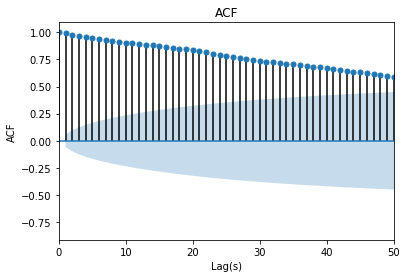

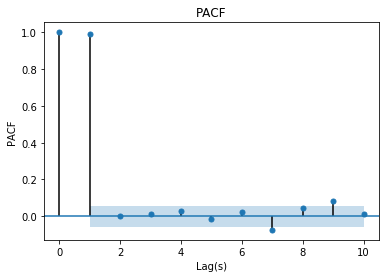

In [26]:
# Plotting ACF and PACF

# ACF
plot_acf(Y)
plt.title('ACF', loc='center')
plt.xlim((0, 50))
plt.ylabel('ACF')
plt.xlabel('Lag(s)')
plt.show()

# PACF
plot_pacf(Y, lags=10)
plt.title('PACF', loc='center')
plt.ylabel('PACF')
plt.xlabel('Lag(s)')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                    XEM   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                2345.396
Method:                       css-mle   S.D. of innovations              0.005
Date:                Sat, 26 May 2018   AIC                          -4678.792
Time:                        10:13:09   BIC                          -4652.410
Sample:                             0   HQIC                         -4668.522
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2142      0.017     12.263      0.000       0.180       0.248
sentiment      0.0023      0.002      1.129      0.259      -0.002       0.006
IOT            0.0697      0.015      4.746      0.0

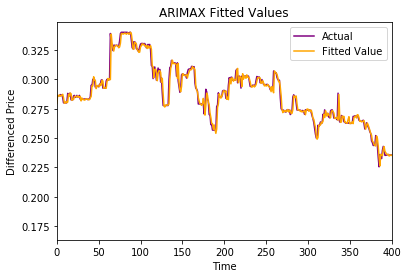

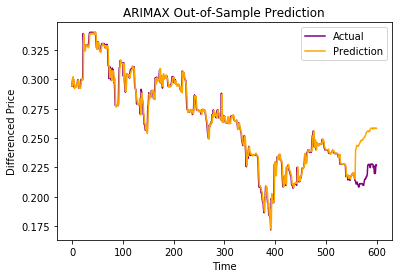

In [31]:
# ARIMAX

# Building AR 2 with exogeneous variables
arima_d = ARIMA(endog=Y_train['XEM'], exog=X_train, order=[1,0,0])
arima_results_d = arima_d.fit()
print(arima_results_d.summary())

# Plotting the fitted values
plt.plot(np.arange(len(Y_train)), Y_train, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_d.fittedvalues)), arima_results_d.fittedvalues, color='orange', label='Fitted Value')
plt.xlim((0, 400))
plt.title('ARIMAX Fitted Values')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Out-of-sample prediction
exog_d = X_test
arima_results_ofs_d = arima_results_d.predict(exog=exog_d, start=exog_d.index[0], end=exog_d.index[-1])
plt.plot(np.arange(len(Y_test)), Y_test, color='purple', label='Actual')
plt.plot(np.arange(len(arima_results_ofs_d)), arima_results_ofs_d, color='orange', label='Prediction')
#plt.xlim((0, 50))
plt.title('ARIMAX Out-of-Sample Prediction')
plt.xlabel('Time')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [28]:
# Metric

# Calculating mean squared error for steps 1-100
expected = Y_test[:99]
predictions = arima_results_ofs_d[:99]
mse = mean_squared_error(expected, predictions)
print('Mean Squared Error')
print('Steps 1-100: %f' % mse)

# Calculating mean squred error for steps 101-600
expected = Y_test[100:]
predictions = arima_results_ofs_d[100:]
mse = mean_squared_error(expected, predictions)
print('Steps 101-600: %f' % mse)

Mean Squared Error
Steps 1-100: 0.000036
Steps 101-600: 0.000118


# Conclusions:

AR model with 3 exogeneous variables performed better than 6 exogeneous variables.

Using AR 1 model with 6 exogeneous variables, the out of sample prediction performed relatively well for steps < 100. Since the error keeps compounding, the model doesn't do so well beyond step 100. MSE for steps 1-100 is 0.000039
while MSE for steps 101-600 is 0.000918.

Using AR 1 model with 3 exogeneous variables, the out of sample prediction performed relatively well for steps < 100. Since the error keeps compounding, the model doesn't do so well beyond step 100. MSE for steps 1-100 is 0.000036 while MSE for steps 101-600 is 0.000118.